In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression


data = pd.read_csv('gld.csv')



           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   No

In [4]:
X_investment = data[['GLD', 'USO']]
y_investment = data['EUR/USD']


In [5]:
scaler = StandardScaler()
X_investment_scaled = scaler.fit_transform(X_investment)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_investment_scaled, y_investment, test_size=0.2, random_state=42)


In [8]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred_investment = lin_reg_model.predict(X_test)


In [10]:
print(f"Linear Regression R^2 Score{r2_score(y_test, y_pred_investment):.2f}")
print(f"Mean Absolute Error{mean_absolute_error(y_test, y_pred_investment):.2f}")


Linear Regression R^2 Score0.69
Mean Absolute Error0.06


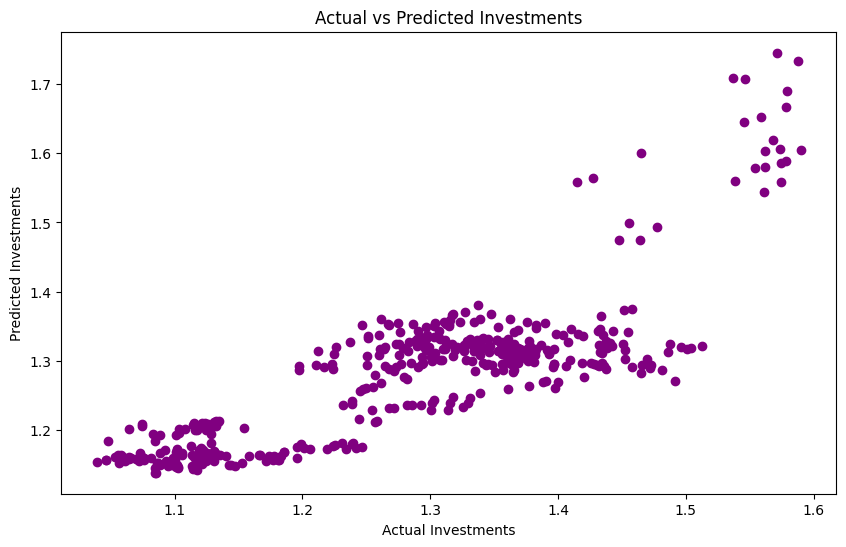

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_investment, color='purple')
plt.xlabel('Actual Investments')
plt.ylabel('Predicted Investments')
plt.title("Actual vs Predicted Investments")
plt.show()